## plot loss function

In [2]:
import os
import json
import numpy as np
os.getcwd()
homedir='/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/'

In [3]:
# cwd = os.getcwd();
# path_to_vaes = '../../training/'
# sub_dirs = [dirname for dirname in os.listdir(path_to_vaes) if not dirname.startswith('.') ] 
# print(sub_dirs)
# last_dir = sub_dirs[-1]
# model_dirs = [dirname for dirname in os.listdir(os.path.join(path_to_vaes,last_dir)) if not dirname.startswith('.')]
# print(model_dirs)

# path_to_model = os.path.join(path_to_vaes,last_dir,model_dirs[1])
# path_to_model
# print(os.path.join(path_to_vaes,last_dir,model_dirs[1]))

# path2vaes = '/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/github/AutomatedDamageDetection/training/'
# modeldir = '2022-07/07-11/model_1657553278/'
# modeldir = '2022-07/model_1658152885/'

modeldir = '2022-10'
modelnum = 'model_1664883952'
path_to_model = os.path.join(homedir,'github/AutomatedDamageDetection/training/',modeldir,modelnum)
print(path_to_model)

/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/github/AutomatedDamageDetection/training/2022-10/model_1664883952


#### loaad history

In [8]:
history_files = [file for file in os.listdir(path_to_model) if 'history' in file]
print(history_files[0])

if len(history_files) > 1:
    loss = []
    val_loss = []
    for hfile in history_files:
        with open(os.path.join(path_to_model,hfile)) as hf:
            data = hf.read()
            data = json.loads(data)
            loss.append(data['loss']['0'])
            val_loss.append(data['val_loss']['0'])
    print(loss)
else:
    hfile=history_files[0]
    with open(os.path.join(path_to_model,hfile)) as hf:
        data = hf.read()
        data = json.loads(data)
        loss = np.array(list(data['loss'].values()))
        val_loss = np.array(list(data['val_loss'].values()))

print(data)
print(loss)


history_epoch_0
{'loss': {'0': 5821.486328125, '1': 5858.4379882812, '2': 5866.1826171875}, 'val_loss': {'0': 6104.4145507812, '1': 5946.3505859375, '2': 5906.1196289062}}
[5821.48632812 5858.43798828 5866.18261719]


In [9]:
print(list(data['loss'].values()))

train_loss = np.array( list(data['loss'].values()) )
train_loss.shape
train_loss


[5821.486328125, 5858.4379882812, 5866.1826171875]


array([5821.48632812, 5858.43798828, 5866.18261719])

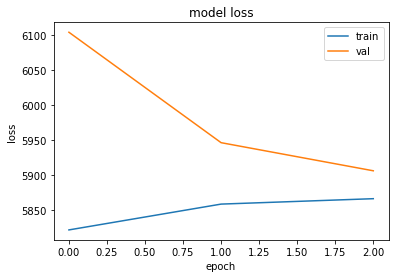

In [10]:
import matplotlib.pyplot as plt
''' ----------
Save model loss figure
------------'''


# summarize history for loss
fig, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

# fig.savefig(os.path.join(path_to_model  , 'model_loss' ) )

In [51]:
# # get traininig tileNums
# with open(os.path.join(path_to_model,'datasets_1657553278.json')) as hf:
#     data = hf.read()
#     data = json.loads(data)
    
# tile_nums = [int(file.split('/')[-1].split('.')[0].split('_')[-1]) for file in data['training']]
# print(tile_nums)
# int(data['training'][0].split('/')[-1].split('.')[0].split('_')[-1])


## load model and get loss components

In [54]:

import tensorflow as tf

model = tf.keras.models.load_model(os.path.join(path_to_model, 'model_epoch_1') )

2022-07-18 13:50:49.152322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
print(model.losses) 

[<tf.Tensor 'Placeholder:0' shape=() dtype=float32>]
